# PCA Citi Surprise Index Background

This notebook will go over the PCs of the various Citi Surprise Indices. 

## Packages

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from   sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from   matplotlib.ticker import FuncFormatter

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot

## Accessing Object

In [2]:
sys.path.append(r"/Users/diegoalvarez/Desktop/research/FXCarryEconomicSurprise/root/src")
sys.path.append(r"C:\Users\Diego\Desktop\app_prod\research\FXCarryCitiSurprise\root\src")
from CitiPCA import PCAModel
df = PCAModel().pca()

## Basic Plotting

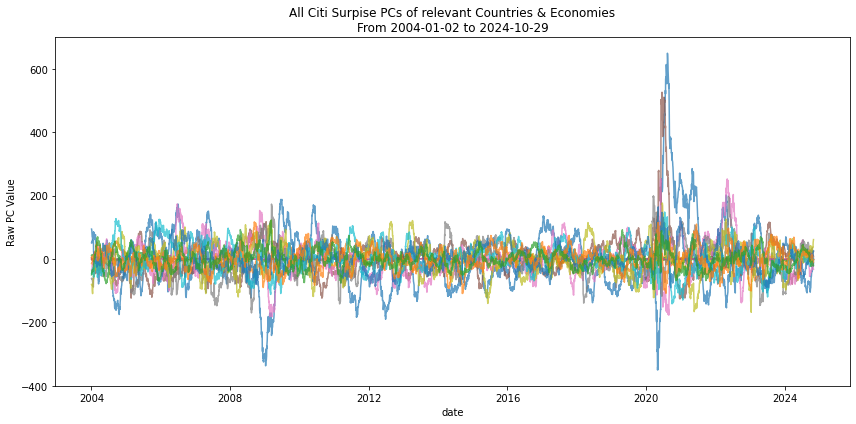

In [3]:
def plot_ts(df: pd.DataFrame) -> plt.Figure: 
    
    (df.rename(
        columns = {"pc": ""}).
        pivot(index = "date", columns = "", values = "value").
        plot(
            ylabel  = "Raw PC Value",
            legend  = False,
            alpha   = 0.7,
            figsize = (12,6),
            title   = "All Citi Surpise PCs of relevant Countries & Economies\nFrom {} to {}".format(
                df.date.min(),
                df.date.max())))

    plt.tight_layout()
    
plot_ts(df)

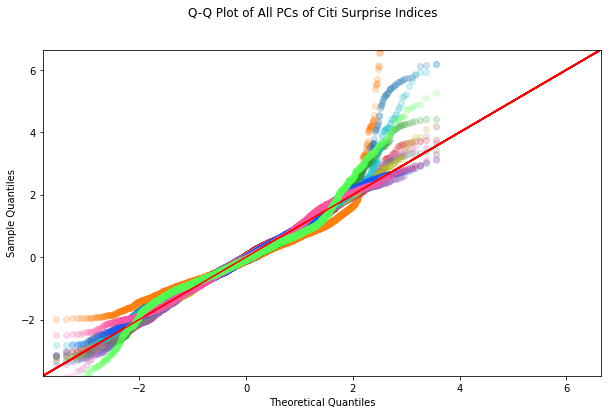

In [4]:
def plot_qq(df: pd.DataFrame) -> plt.Figure: 
    
    pcs = {
        "PC1" : "#1f77b4",
        "PC2" : "#ff7f0e",
        "PC3" : "#2ca02c",
        "PC4" : "#d62728",
        "PC5" : "#9467bd",
        "PC6" : "#8c564b",
        "PC7" : "#e377c2",
        "PC8" : "#7f7f7f",
        "PC9" : "#bcbd22",
        "PC10": "#17becf",
        "PC11": "#1a55ff",
        "PC12": "#ff55a3",
        "PC13": "#55ff55"}

    fig, axes = plt.subplots(figsize = (10,6))

    for pc in pcs.keys():

        values = (df.query(
            "pc == @pc").
            value)

        qqplot(
            ax              = axes,
            data            = values, 
            fit             = True, 
            line            = "45", 
            markerfacecolor = pcs[pc], 
            markeredgecolor = pcs[pc],
            alpha           = 0.2)
        
    fig.suptitle("Q-Q Plot of All PCs of Citi Surprise Indices")
    
plot_qq(df)